# Solveur d'équations différentielles.

In [64]:
import numpy as np
import matplotlib.pyplot as plt

## I. Schémas explicites à pas constant.

### Schéma d'Euler explicite.


In [65]:
def solve_euler_explicit(f, x0 : np.ndarray, dt, to, tf):
    T = []
    X = []                                                #liste des vecteurs x
    X.append(x0)
    #g = np.vectorize(f)
    for i in range(1,int((tf-to)//dt)):
        X.append(X[i-1] + dt * f(T[i-1], X[i-1]))         # a priori f à été définie de R^n vers R^n
    return (T, X)


In [67]:
def f(t, x):
    return (- 1/(1+t**2) * x)

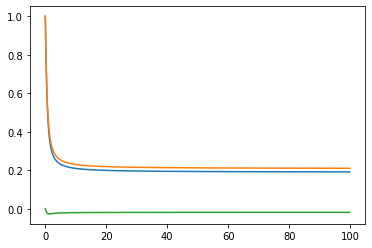

In [68]:
T, X = solve_euler_explicit(f, 1, 0.1, 0, 100)
Y = [np.exp(-np.arctan(t)) for t in T]
Z = [x-y for x, y in zip(X, Y)]
#et en superposant les courbes:
plt.plot(T, X)
plt.plot(T, Y)
plt.plot(T, Z)
plt.show()

#### Illustration de la convergence.
On s'intéresse à $\underset{\Delta \rightarrow 0}{lim}\underset{1\le j \le J}{max}$ $\vert\vert x^{j} - x(t_{j}) \vert\vert$

On le trace en fonction du pas de temps dt. On trace une droite qui majore cette quantité (en tout cas pour dt assez grand pour que les erreurs liées à la représentation des nombres en machine n'intervienne pas).

On trace de plus une droite  y = Cv * dt pour Cv arbitraire.


[]

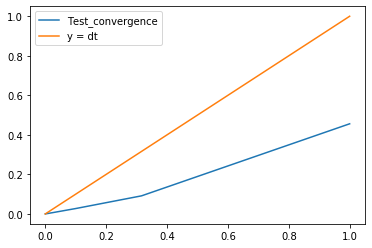

In [104]:
def test_convergence_f_dt(f, x0, dt, to, tf):
    T, X = solve_euler_explicit(f, x0, dt, to, tf)
    Y = [np.exp(-np.arctan(t)) for t in T]
    return(max((abs(Y[i] - X[i]) for i in range(len(T)))))

Test_convergence = []
DT = [10**(- 0.5*i) for i in range(12)] #dt varie de 1 à 10^-6
for dt in DT:
    Test_convergence.append(test_convergence_f_dt(f, 1, dt, 0, 10))
plt.plot(DT, Test_convergence, label = 'Test_convergence')

# comparaison avec une droite
Droite = [1 * dt for dt in DT]
plt.plot(DT, Droite, label = "y = dt")
plt.legend()
plt.plot()

On remarque que pour Cv = 10, on a bien un shéma convergent d'ordre 1, si on considère que l'erreur pour dt <= 0.01 est du aux erreurs d'arrondis de la machine.

On peut vérifier l'ordre de convergence en traçant $ln(\underset{\Delta \rightarrow 0}{lim}\underset{1\le j \le J}{max}$ $\vert\vert x^{j} - x(t_{j}) \vert\vert)$ en fonction de $ln(dt)$

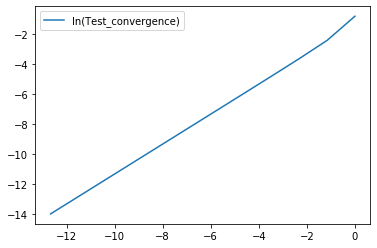

In [101]:
ln_DT = [np.log(dt) for dt in DT]
ln_Test_convergence = [np.log(e) for e in Test_convergence]
plt.plot(ln_DT, ln_Test_convergence, label = 'ln(Test_convergence)')
plt.legend()
plt.show()

On obtient bien une droite de pente 1.

### Schéma d'ordre 2 - Méthode de Heun.


In [105]:
def solve_Heun_explicit(f, x0 : np.ndarray, dt, to, tf):
    T = []
    T.append(to)
    X = []
    X.append(x0)
    for i in range(1, int((tf-to)/dt)): 
        T.append(i * dt)
        k1 = f(T[i-1], X[i-1])
        k2 = f(T[i-1], X[i-1] + k1*dt)
        X.append(X[i-1] + dt/2 * (k1 + k2))
    return(T, X)
    

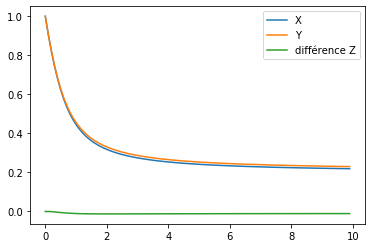

In [106]:
T, X = solve_Heun_explicit(f, 1, 0.1, 0, 10)
Y = [np.exp(-np.arctan(t)) for t in T]
Z = [x-y for x, y in zip(X, Y)]
#et en superposant les courbes:
plt.plot(T, X, label = 'X')
plt.plot(T, Y, label = 'Y')
plt.plot(T, Z, label = 'différence Z')
plt.legend()
plt.show()

On défini une nouvelle fonction test_convergence:

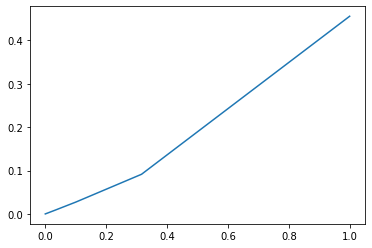

In [107]:
def test_convergence_2_f_dt(f, x0, dt, to, tf):
    T, X = solve_Heun_explicit(f, x0, dt, to, tf)
    Y = [np.exp(-np.arctan(t)) for t in T]
    return(max((abs(Y[i] - X[i]) for i in range(len(T)))))

Test_convergence_2 = []
DT = [10**(- 0.5*i) for i in range(12)]   #dt varie de 1 à 10^-6
for dt in DT:
    Test_convergence_2.append(test_convergence_f_dt(f, 1, dt, 0, 10))
plt.plot(DT, Test_convergence_2)
plt.show()

On trace de même  $ln(\underset{\Delta \rightarrow 0}{lim}\underset{1\le j \le J}{max}$ $\vert\vert x^{j} - x(t_{j}) \vert\vert)$ en fonction de $ln(dt)$

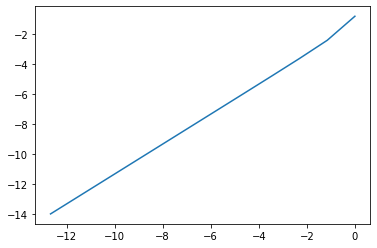

In [97]:
ln_DT = [np.log(dt) for dt in DT]
ln_Test_convergence_2 = [np.log(e) for e in Test_convergence_2]
plt.plot(ln_DT, ln_Test_convergence_2)
plt.show()

## III. Euler explicit à pas variable.


On recopie la fonction du notebook. 

In [ ]:
def solve_ivp_euler_explicit_variable_step(f, t0, x0, t_f, dtmin = 1e-16, dtmax = 0.01, atol = 1e-6):
    dt = dtmax/10; # initial integration step
    ts, xs = [t0], [x0]  # storage variables
    t = t0
    ti = 0  # internal time keeping track of time since latest storage point : must remain below dtmax
    x = x0
    while ts[-1] < t_f:
        while ti < dtmax:
            t_next, ti_next, x_next = t + dt, ti + dt, x + dt * f(x)    #à chaque passage on augmente ti de dt, dt
            x_back = x_next - dt * f(x_next)
            ratio_abs_error = atol / (linalg.norm(x_back-x)/2)          
            #On calcule Tolabs / norm(e^(j+1)), sachant que dans le cade le calcul est simplifié, il y a un x_next qui part
           
            
            
            dt = 0.9 * dt * sqrt(ratio_abs_error)                       #on calcule Delta tnew avec une norme de sécurité 0.9
            if dt < dtmin:
                raise ValueError("Time step below minimum")             
                # si dt < dtmin, c'est que dtmin est trop petit pour avoir la précision demandée.
                
            elif dt > dtmax/2:
                dt = dtmax/2
            t, ti, x = t_next, ti_next, x_next
        dt2DT = dtmax - ti 
        # time left to dtmax: le but est de prendre la valeur de pas la plus grande possible inférieur à dtmax, 
        
        t_next, ti_next, x_next = t + dt2DT, 0, x + dt2DT * f(x) 
        
        ts = vstack([ts,t_next])                                 #On concatène
        xs = vstack([xs,x_next])                                  
        t, ti, x = t_next, ti_next, x_next                       #t et x sont les nouveaux points de départ, on réinitialise ti
    return (ts, xs.T)